In [56]:
import tweepy as tw
import pandas as pd

In [22]:
# with open('twitter-tokens.txt', 'r') as tfile:
#     consumer_key = tfile.readline().strip('\n')
#     consumer_secret = tfile.readline().strip('\n')
#     access_token = tfile.readline().strip('\n')
#     access_token_secret = tfile.readline().strip('\n')

In [58]:
auth = tw.AppAuthHandler(consumer_key, consumer_secret)

In [60]:
api = tw.API(auth)
# print(api)
query_search= "Bolsonaro"  + " -filter:retweets"
cursor_tweets = tw.Cursor(api.search,q=query_search).items(100)
for tweet in cursor_tweets:
  print(tweet.text)

Bolsonaro e sua malta sempre foram milicianos, corruptos, assassinos, genocidas. Porque agora seria diferente? Seus… https://t.co/JkLEAmZW8L
@PlantaoJDL @joicehasselmann @PatrickFolena2 Deixa de ser cretino....
Bolsonaro é o melhor presidente que já tivemo… https://t.co/LvoZnKwr7z
@filipeleless Ok, os protestos só adiantaram pra gerar mais votos pro Bolsonaro apenas isso!
@Sandroka131 Fora Bolsonaro genocida, tem que ser afastado do Brasil. Impeachment já.!!!!
@91Bannon @manuelunico @folha Me mostre onde eu disse que era de esquerda. Você agora entregou sua militância. Uma… https://t.co/WKKSsTzr0u
nenhum jornal brasileiro lê Bolsonaro como borba gato. esse é o maior erro do jornalismo brasileiro de todos os tempos
@lovesickfornini o Bolsonaro deve ser tão gostoso de se mamar
Eu não consigo entender como tem “cristão” que apoia Bolsonaro. 
Jesus amou até o fim, venceu preconceitos, desauto… https://t.co/ln255CmAKA
Kkkkkk Bandidos, realmente, não gostam de pessoas honestas, como Bolsonar

In [61]:
twkeys = tweet._json.keys()

In [62]:
twkeys

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [63]:
tweets_dict = {}
tweets_dict = tweets_dict.fromkeys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted'])

In [47]:
tweets_dict

{'contributors': None,
 'coordinates': None,
 'created_at': None,
 'entities': None,
 'favorite_count': None,
 'favorited': None,
 'geo': None,
 'id': None,
 'id_str': None,
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': None,
 'metadata': None,
 'place': None,
 'retweet_count': None,
 'retweeted': None,
 'source': None,
 'text': None,
 'truncated': None,
 'user': None}

In [119]:
query_search= "#almanara"  + " -filter:retweets" 
cursor_tweets = tw.Cursor(api.search,
                          since="2021-07-10",
                          # until="2021-07-25",
            q=query_search).items(200)

# print(len(cursor_tweets))

# for tweet in cursor_tweets:
#   print(tweet.text)

In [120]:
for tweet in cursor_tweets:
  for key in tweets_dict.keys():
    try:
      twvalue = tweet._json[key]
      tweets_dict[key].append(twvalue)
    except KeyError:
      twvalue = ""
      if (tweets_dict[key] is None):
        tweets_dict[key] = [twvalue]
      else:
        tweets_dict[key].append(twvalue)
    except:
      tweets_dict[key] = [twvalue]
    # print("tweets_dict[key]: {} - tweet[key]: {}".format(tweets_dict[key],  twvalue))

In [66]:
# tweets_dict

In [121]:
dfTweets = pd.DataFrame.from_dict(tweets_dict)

In [104]:
# dfTweets.head()
dfTweets.to_csv('teste.csv',sep=';')

In [122]:
dfTweets.shape

(4984, 23)

In [74]:
import csv
import nltk
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
nltk.download()

In [124]:
dfTweets['tokenized_text'] = dfTweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [125]:
stopwords = nltk.corpus.stopwords.words('portuguese')

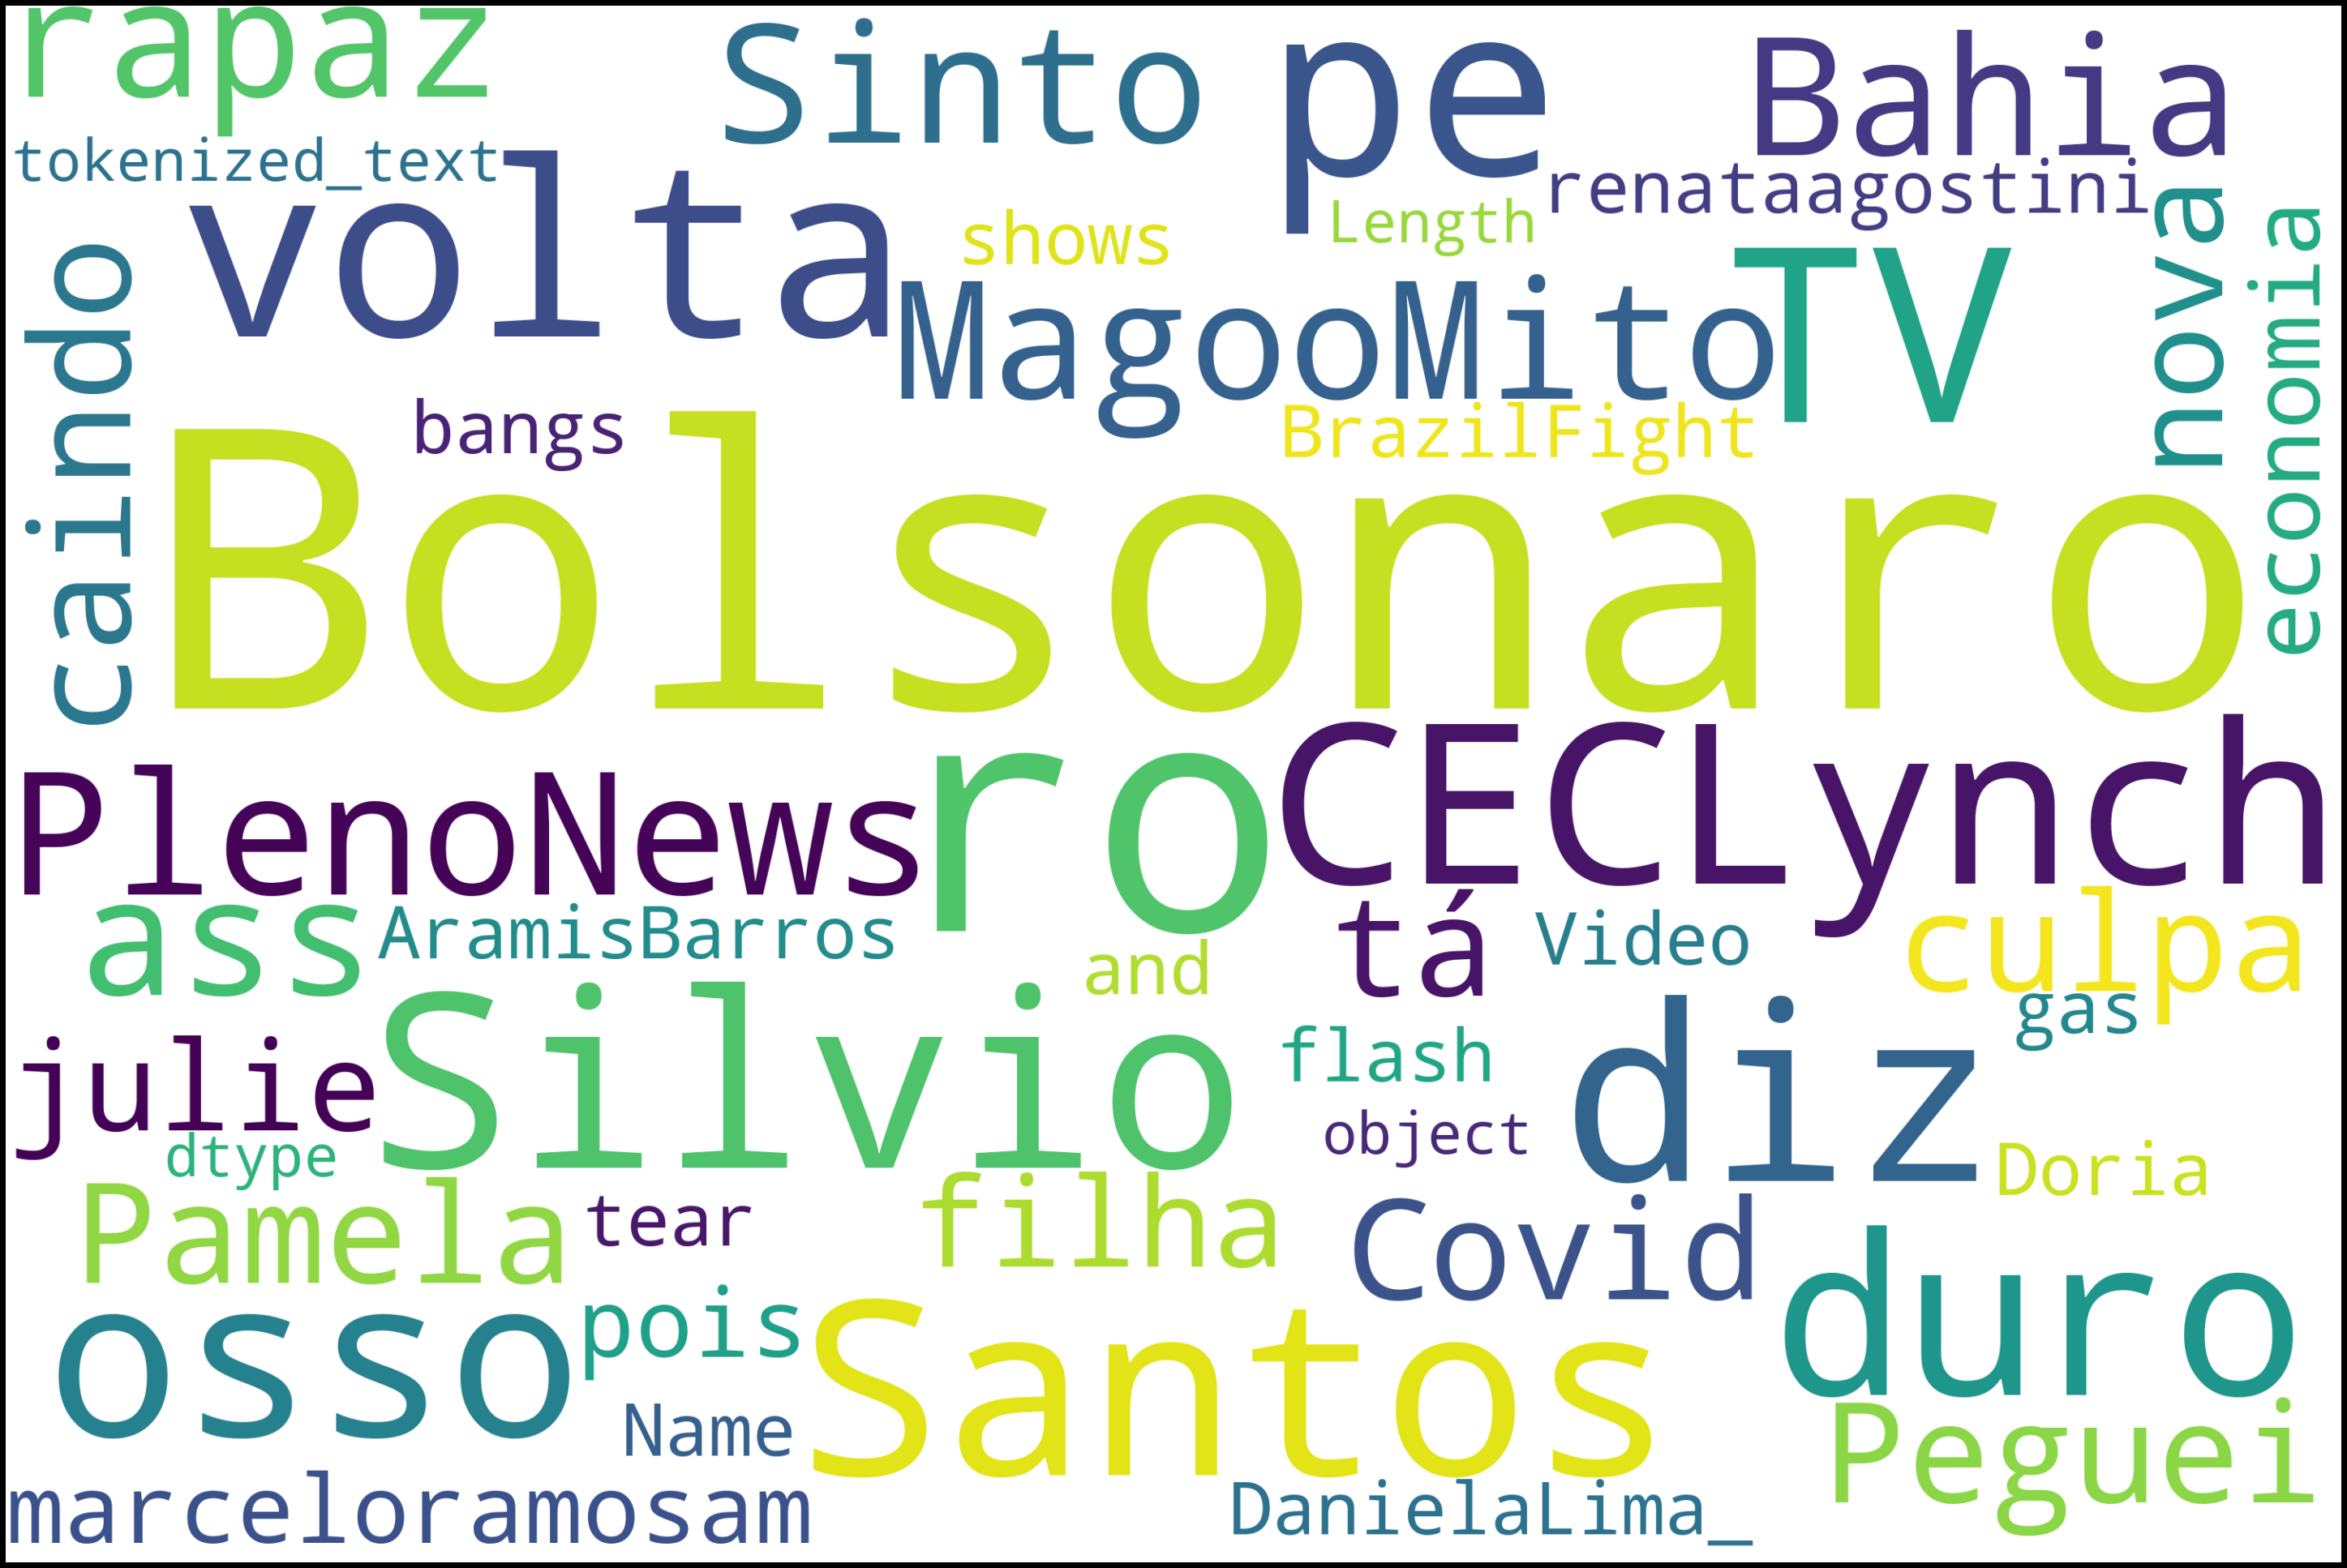

In [79]:
#Bolsonaro
text = dfTweets.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

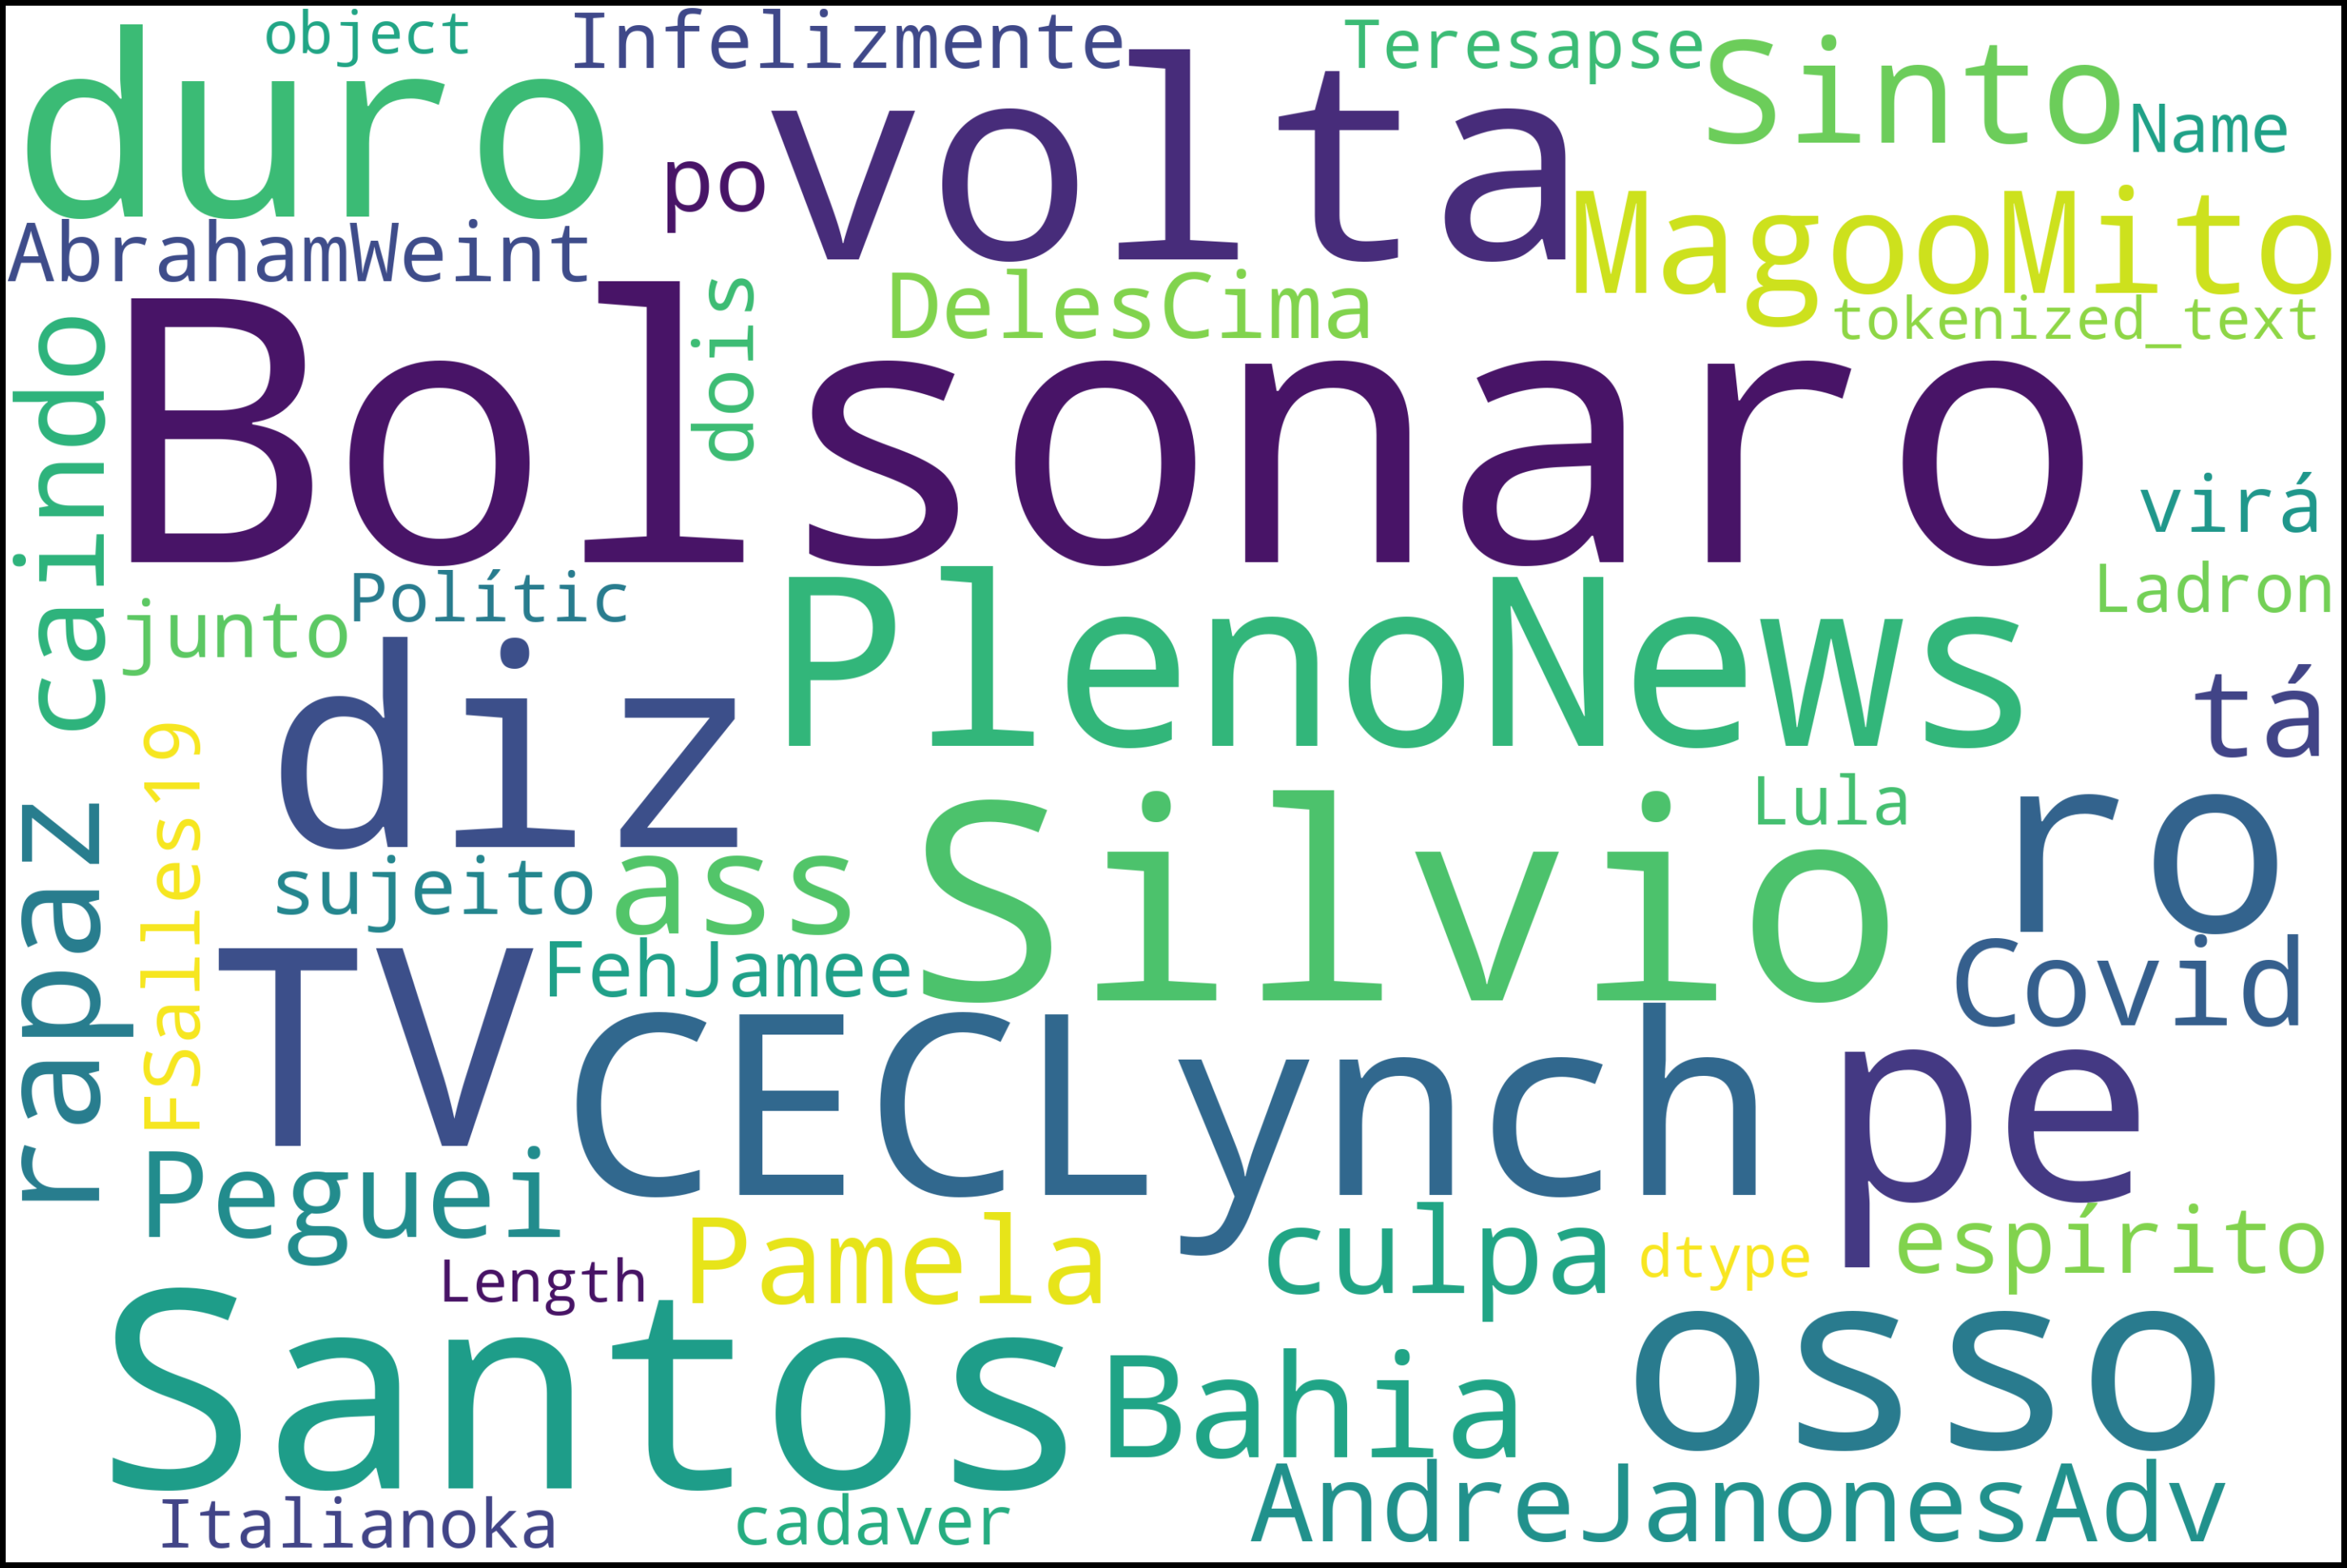

In [84]:
#Lula
text = dfTweets.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

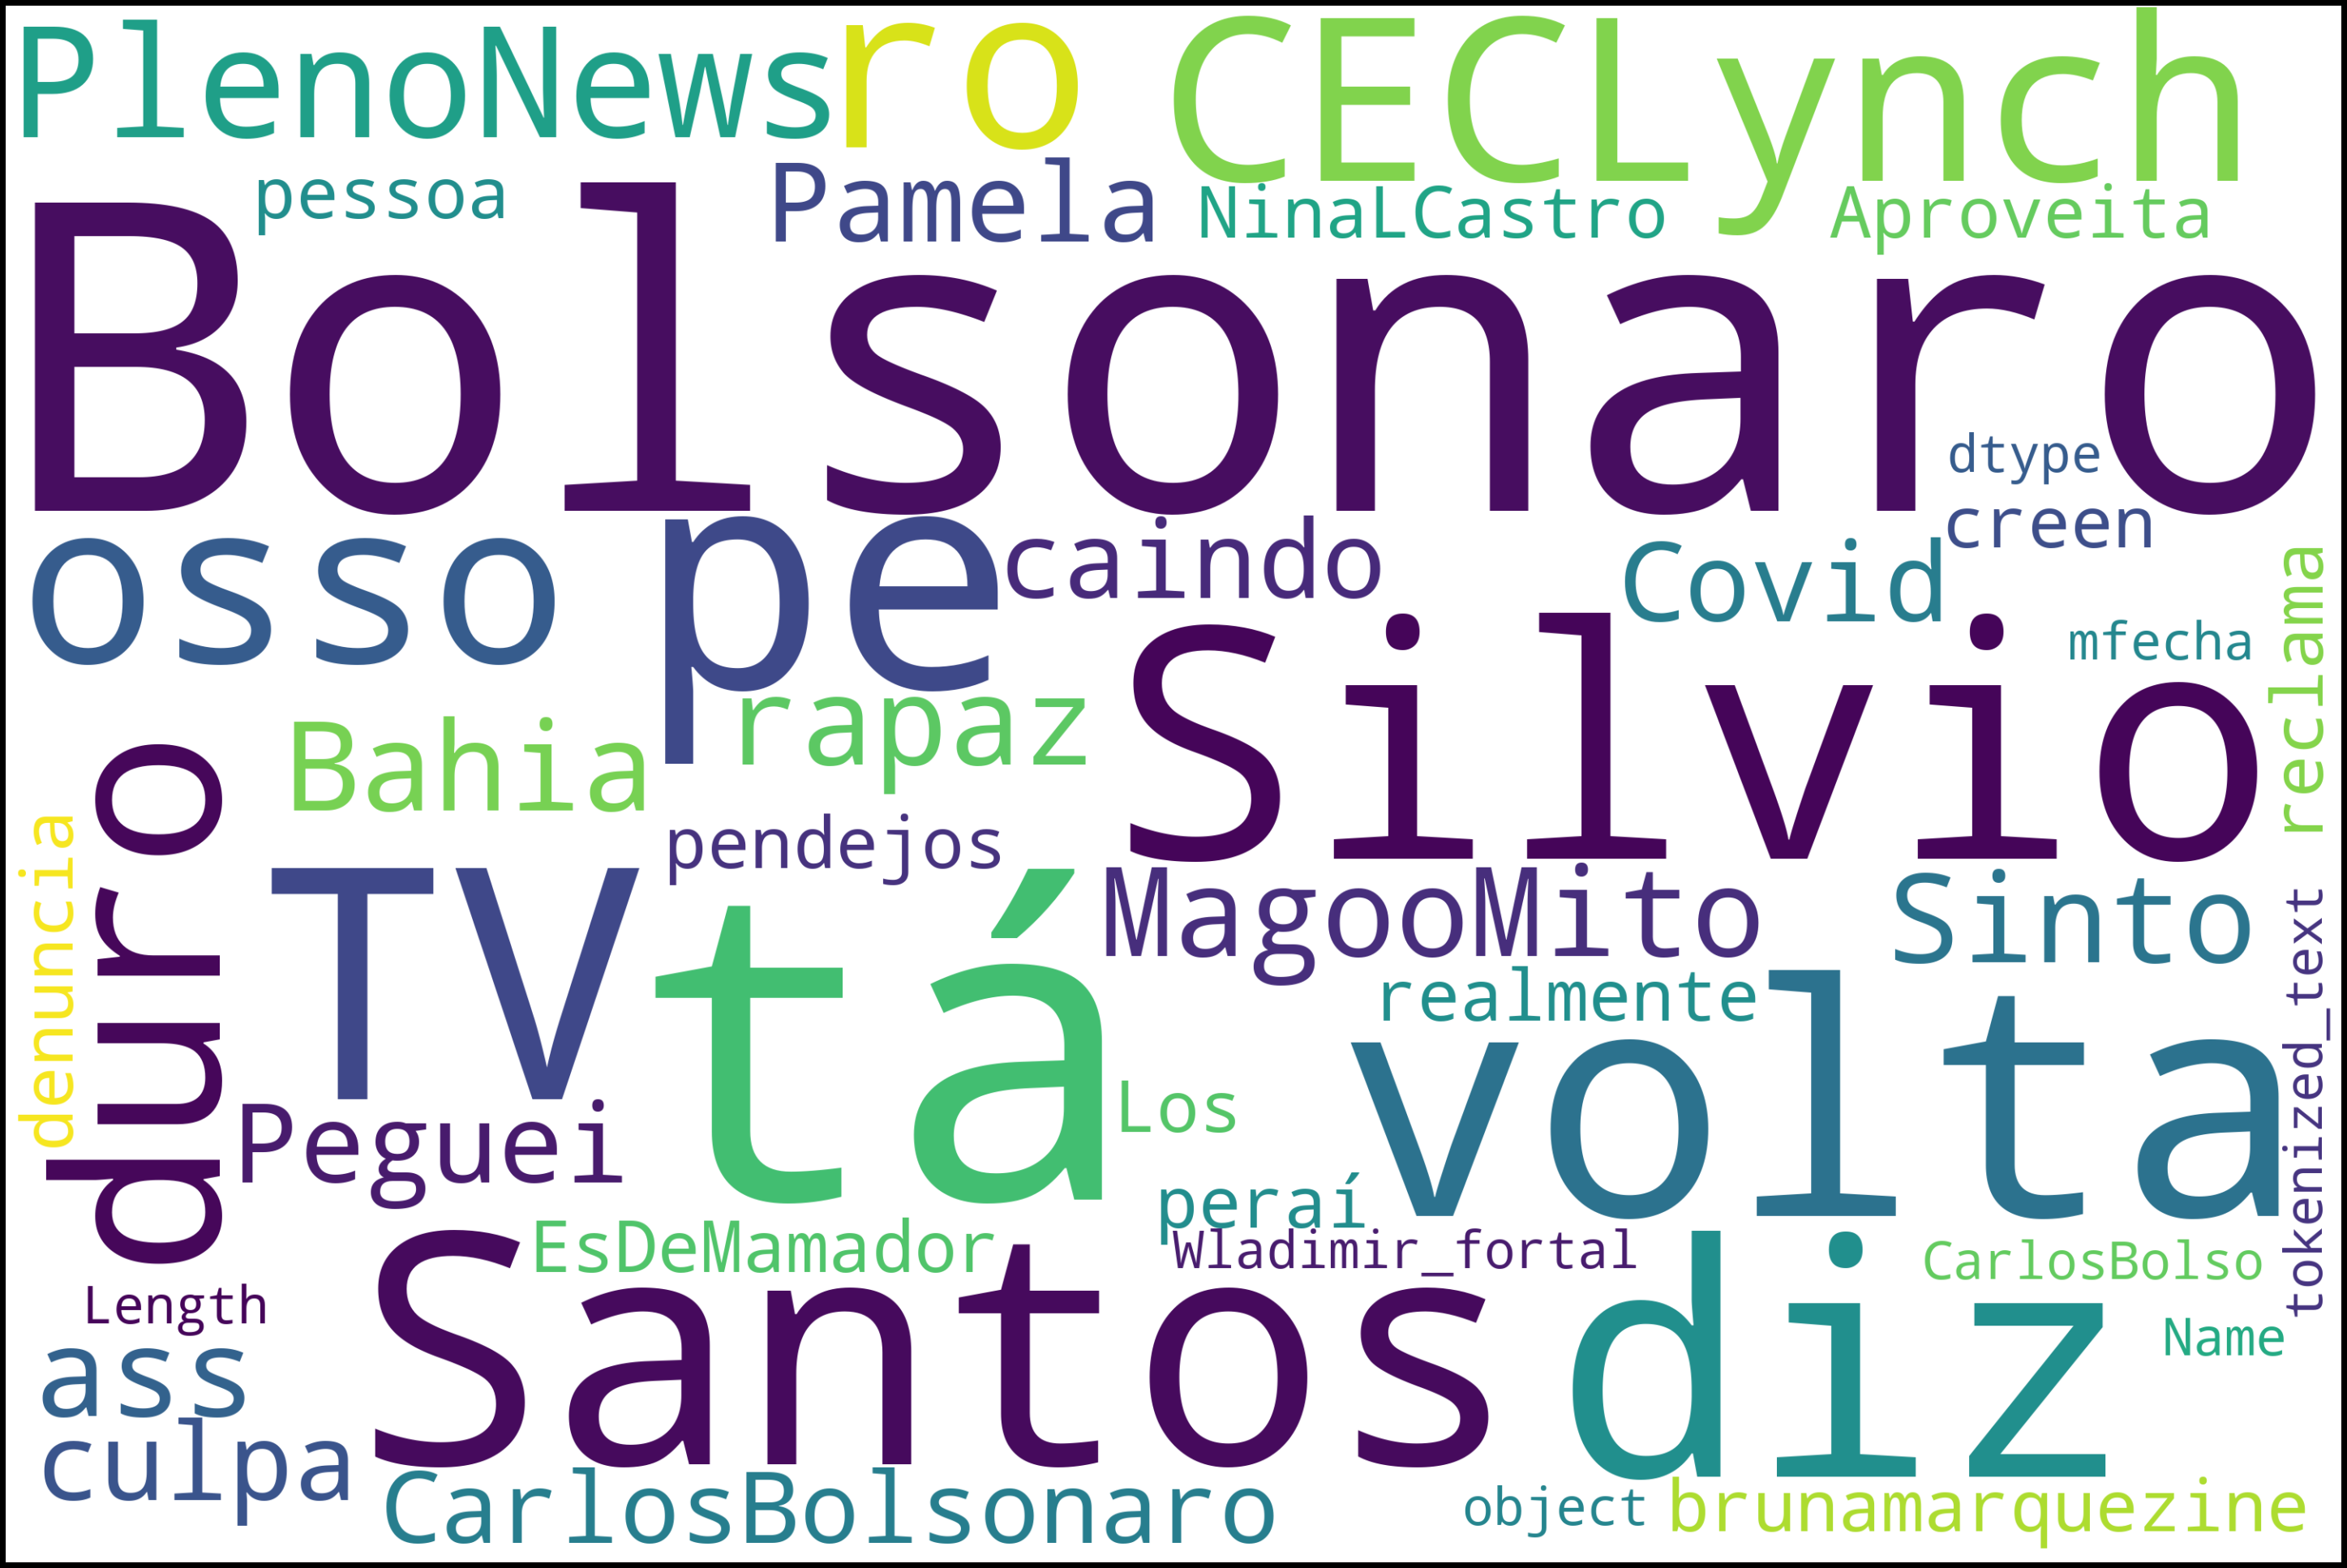

In [90]:
#Genocida
text = dfTweets.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

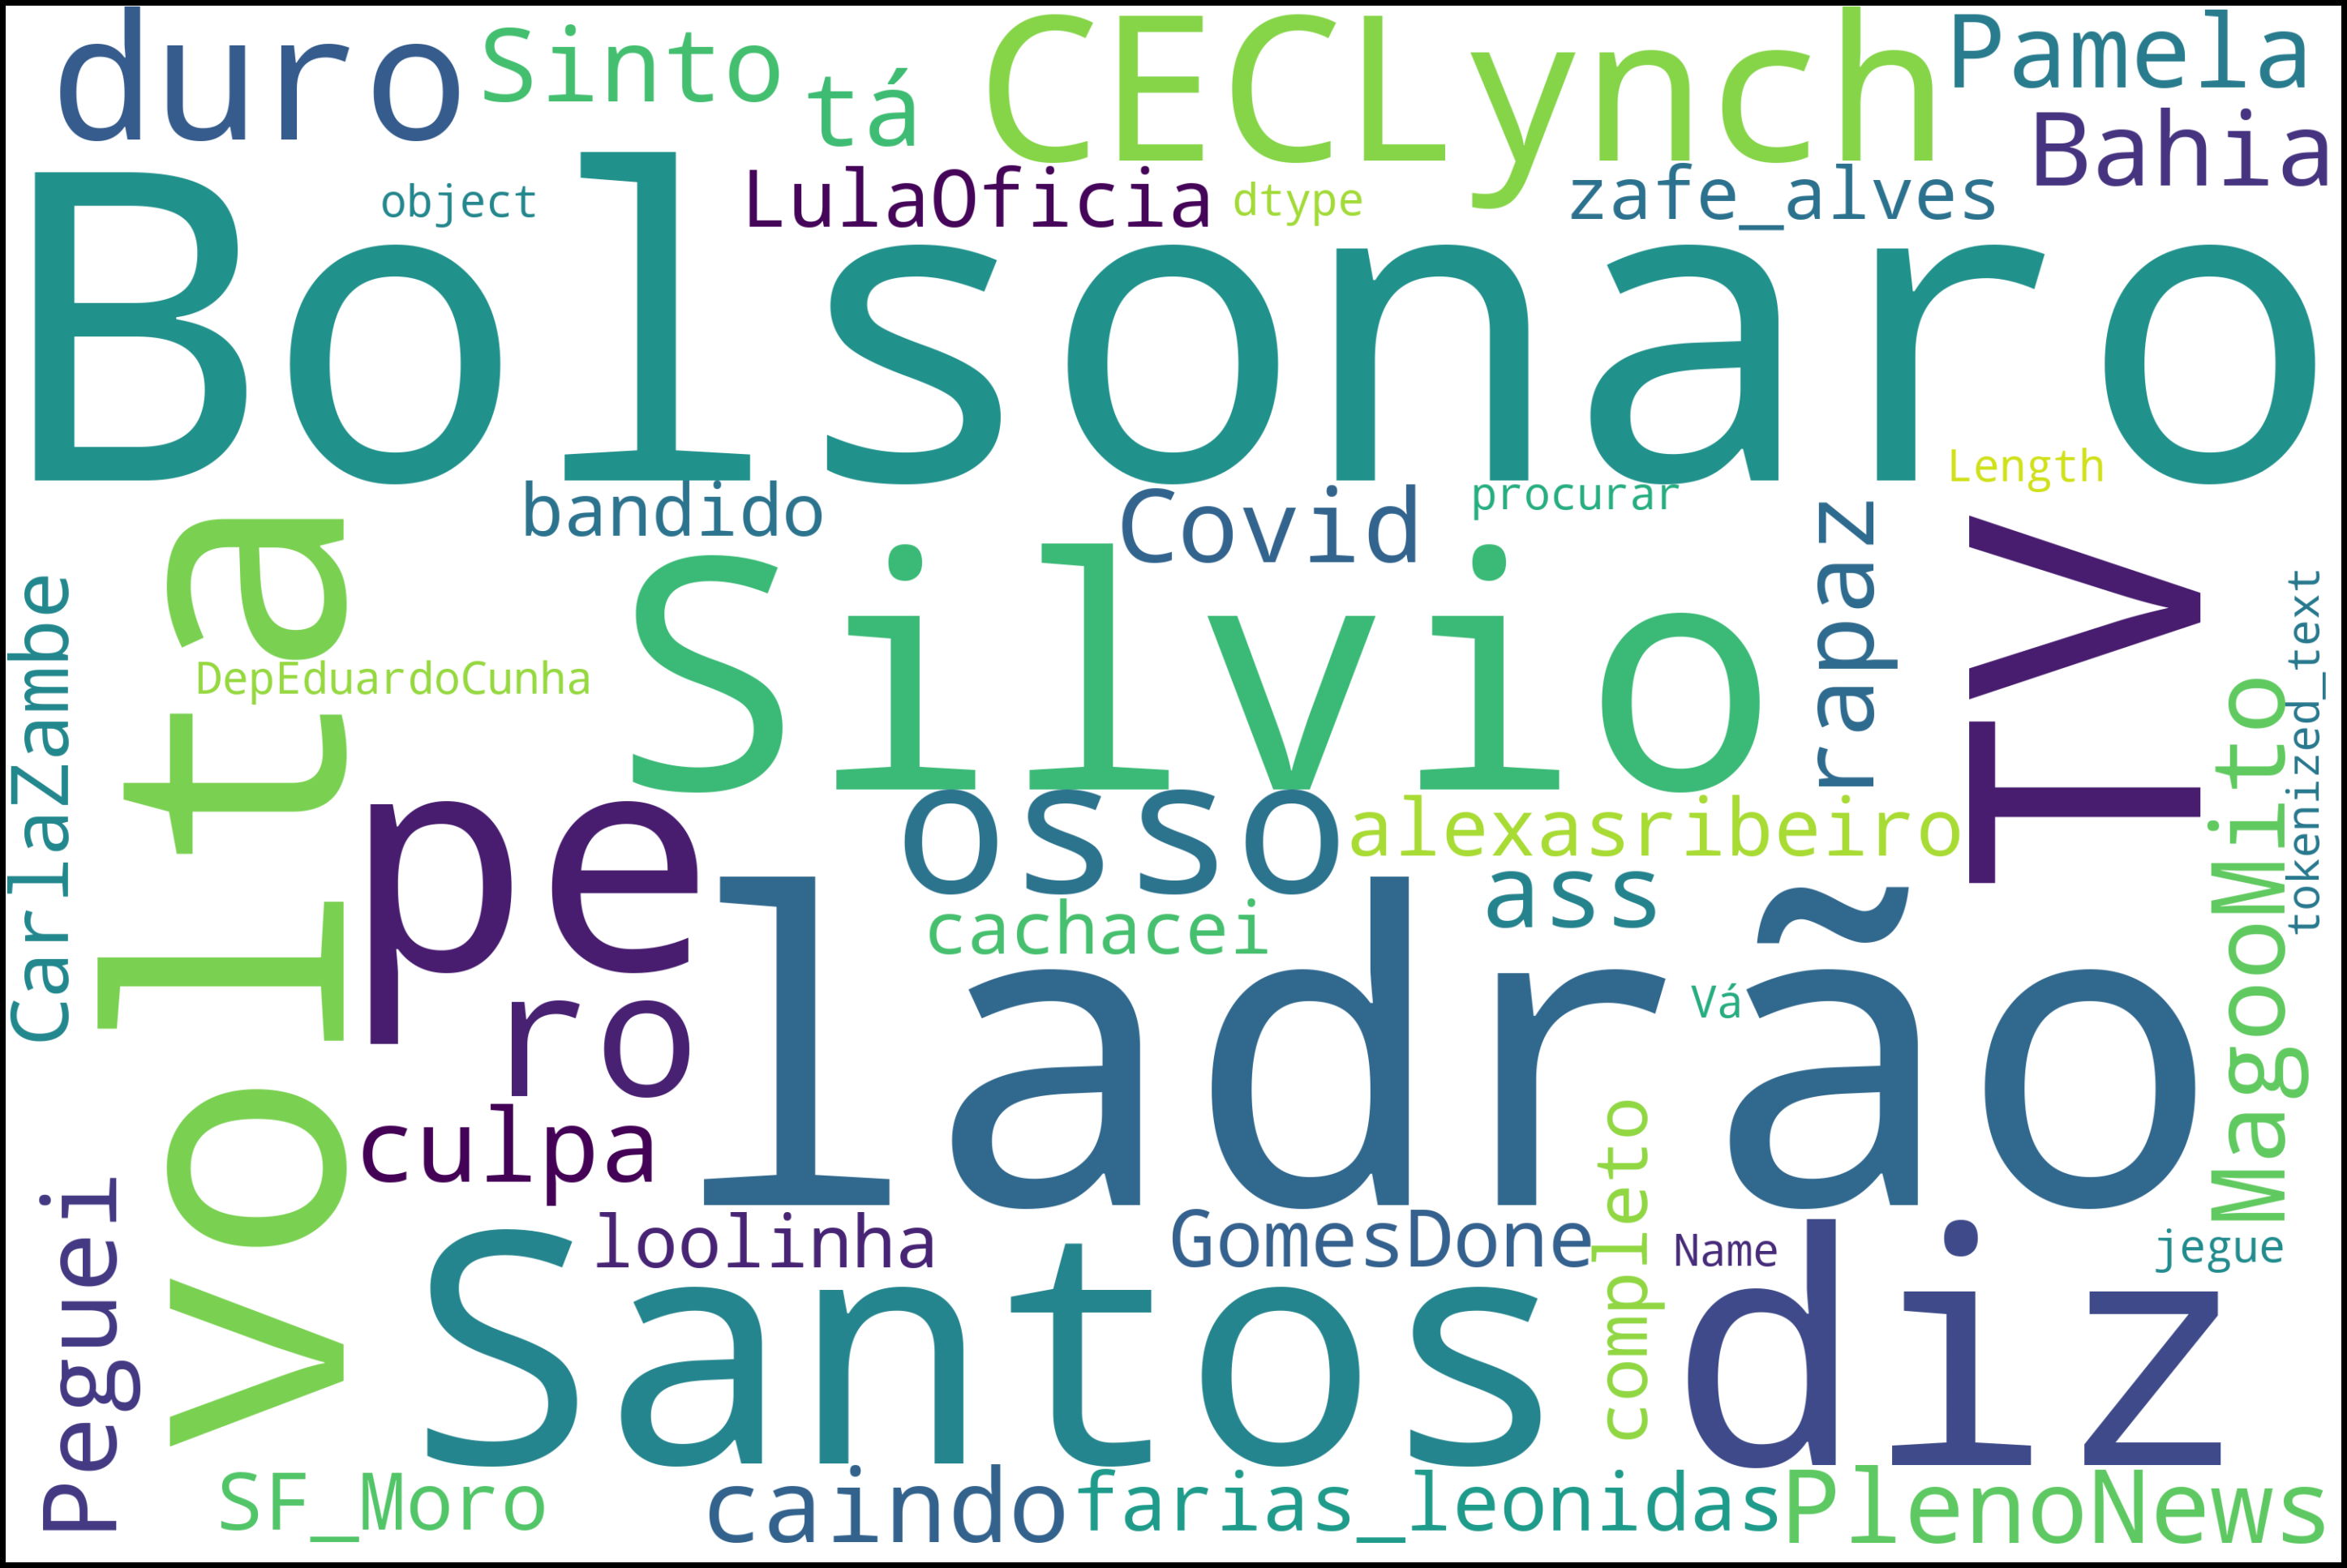

In [96]:
#ladrão
text = dfTweets.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

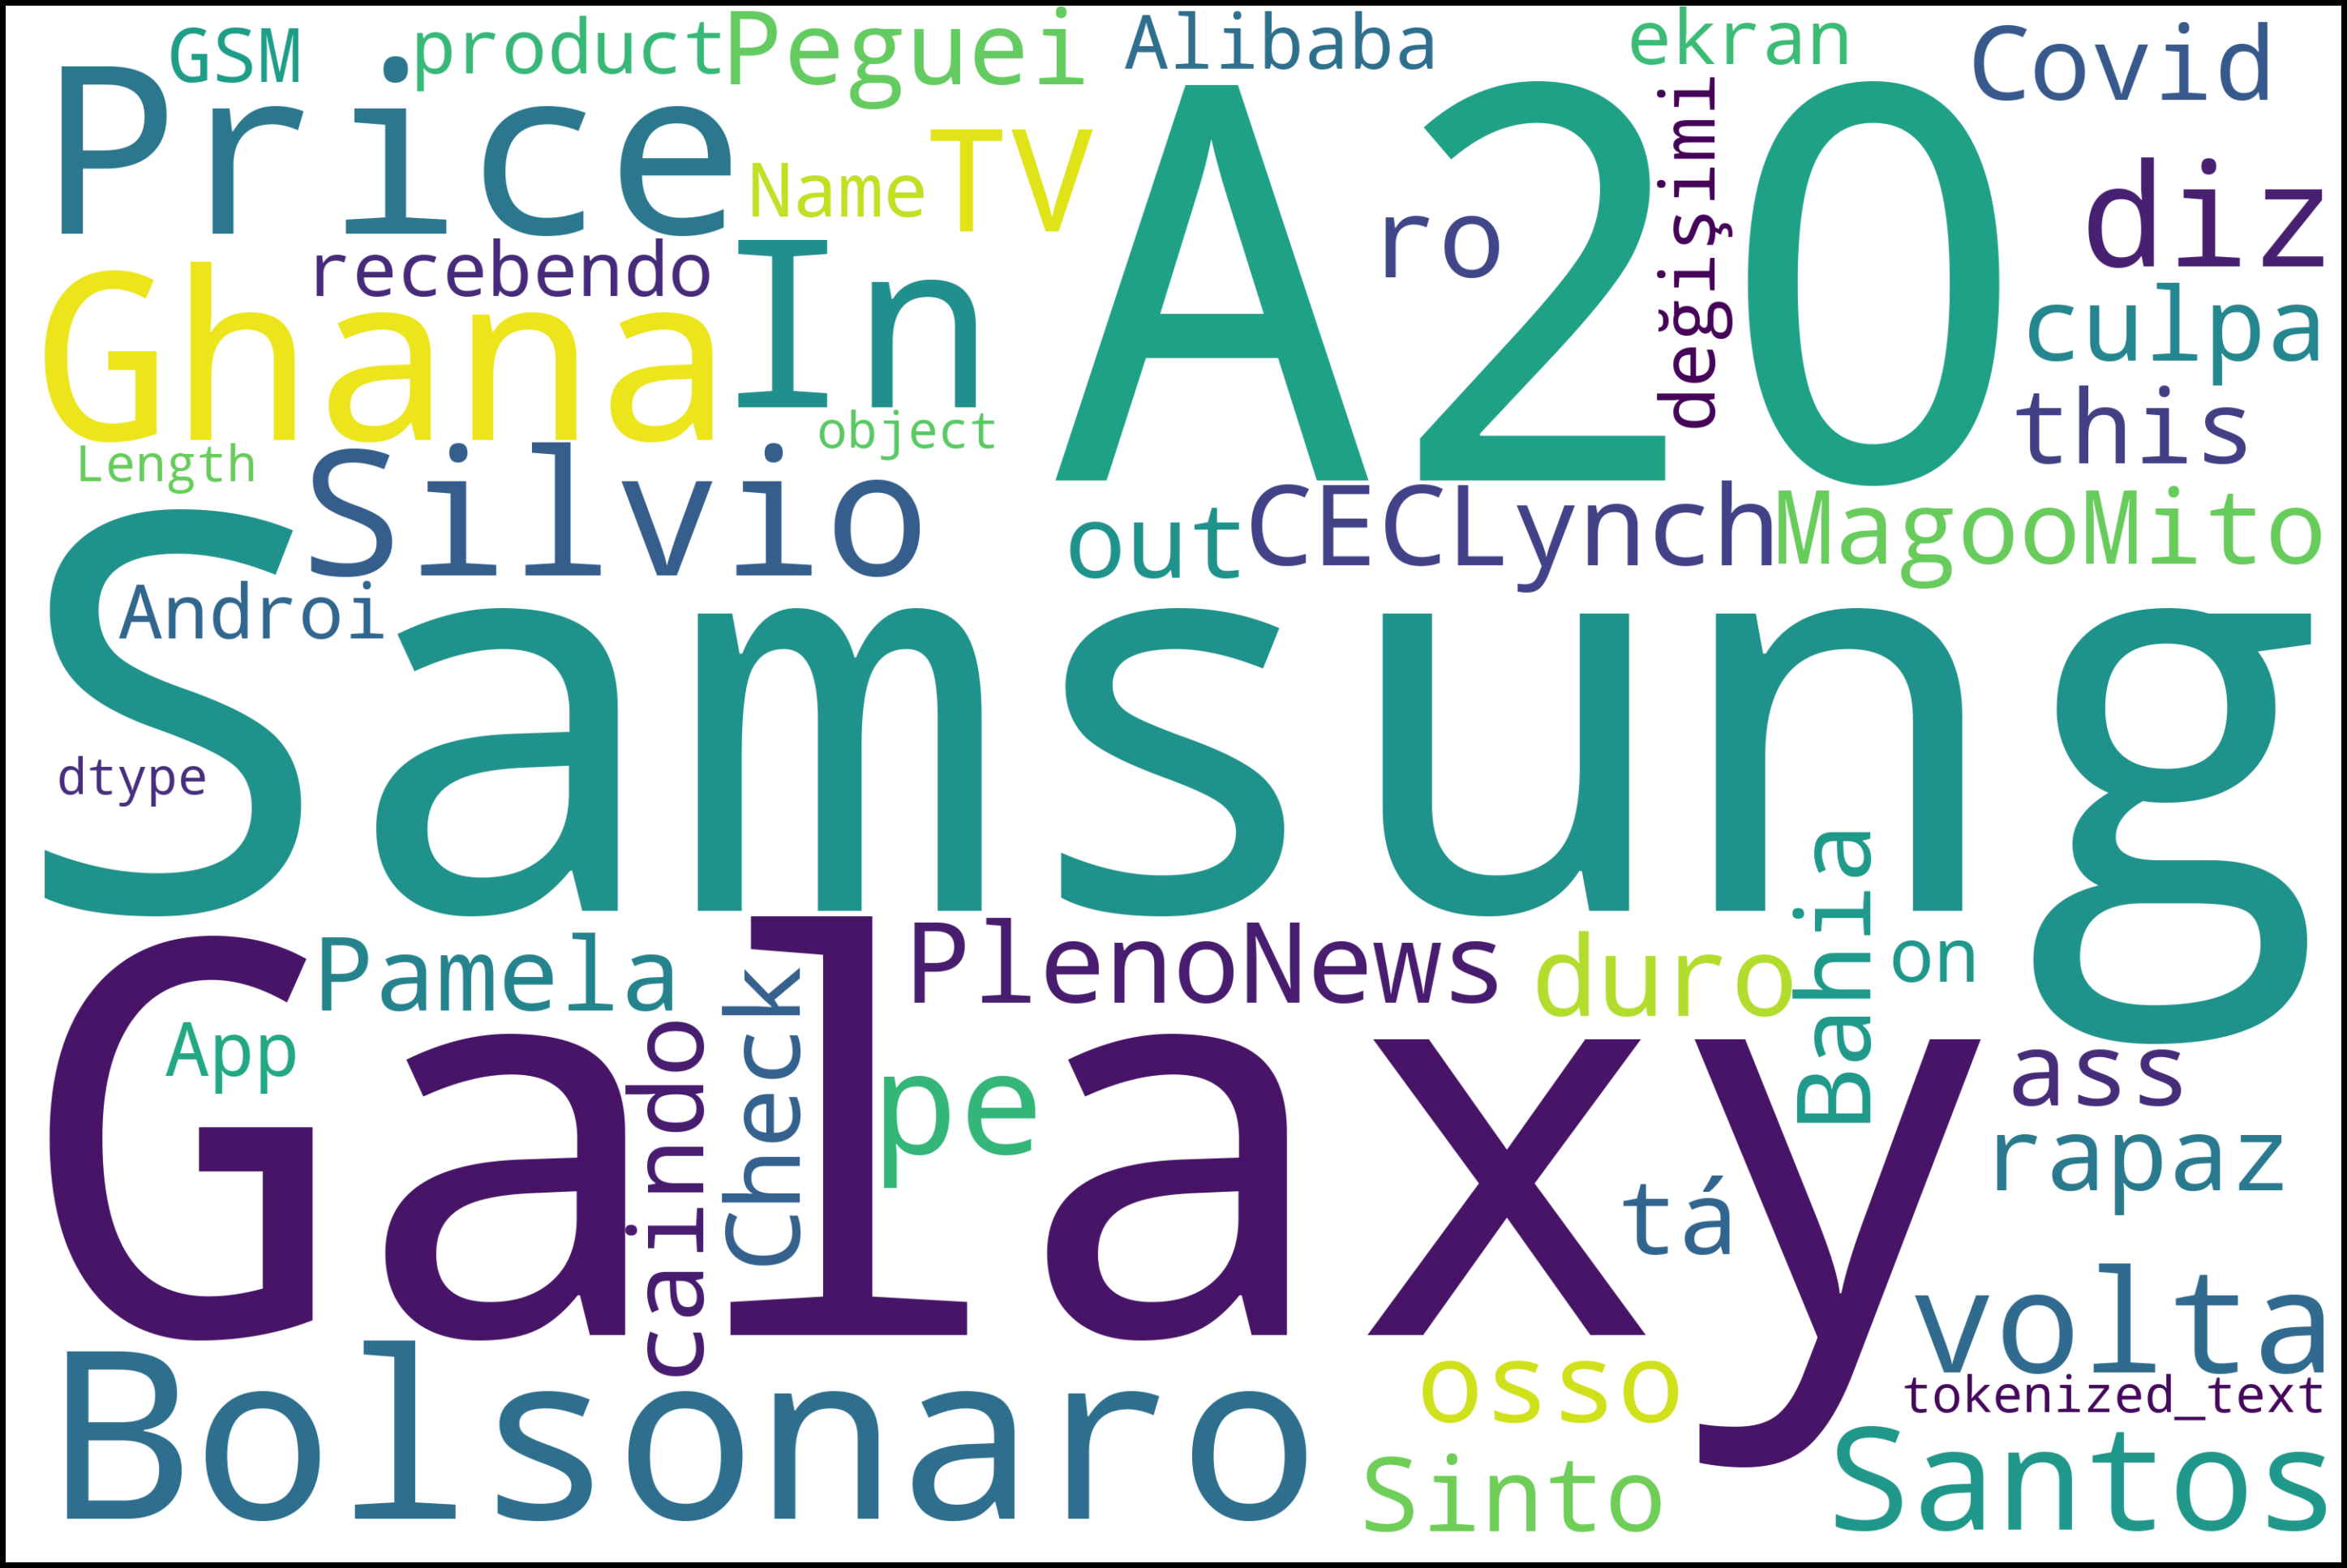

In [111]:
#Samsung a20
text = dfTweets.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

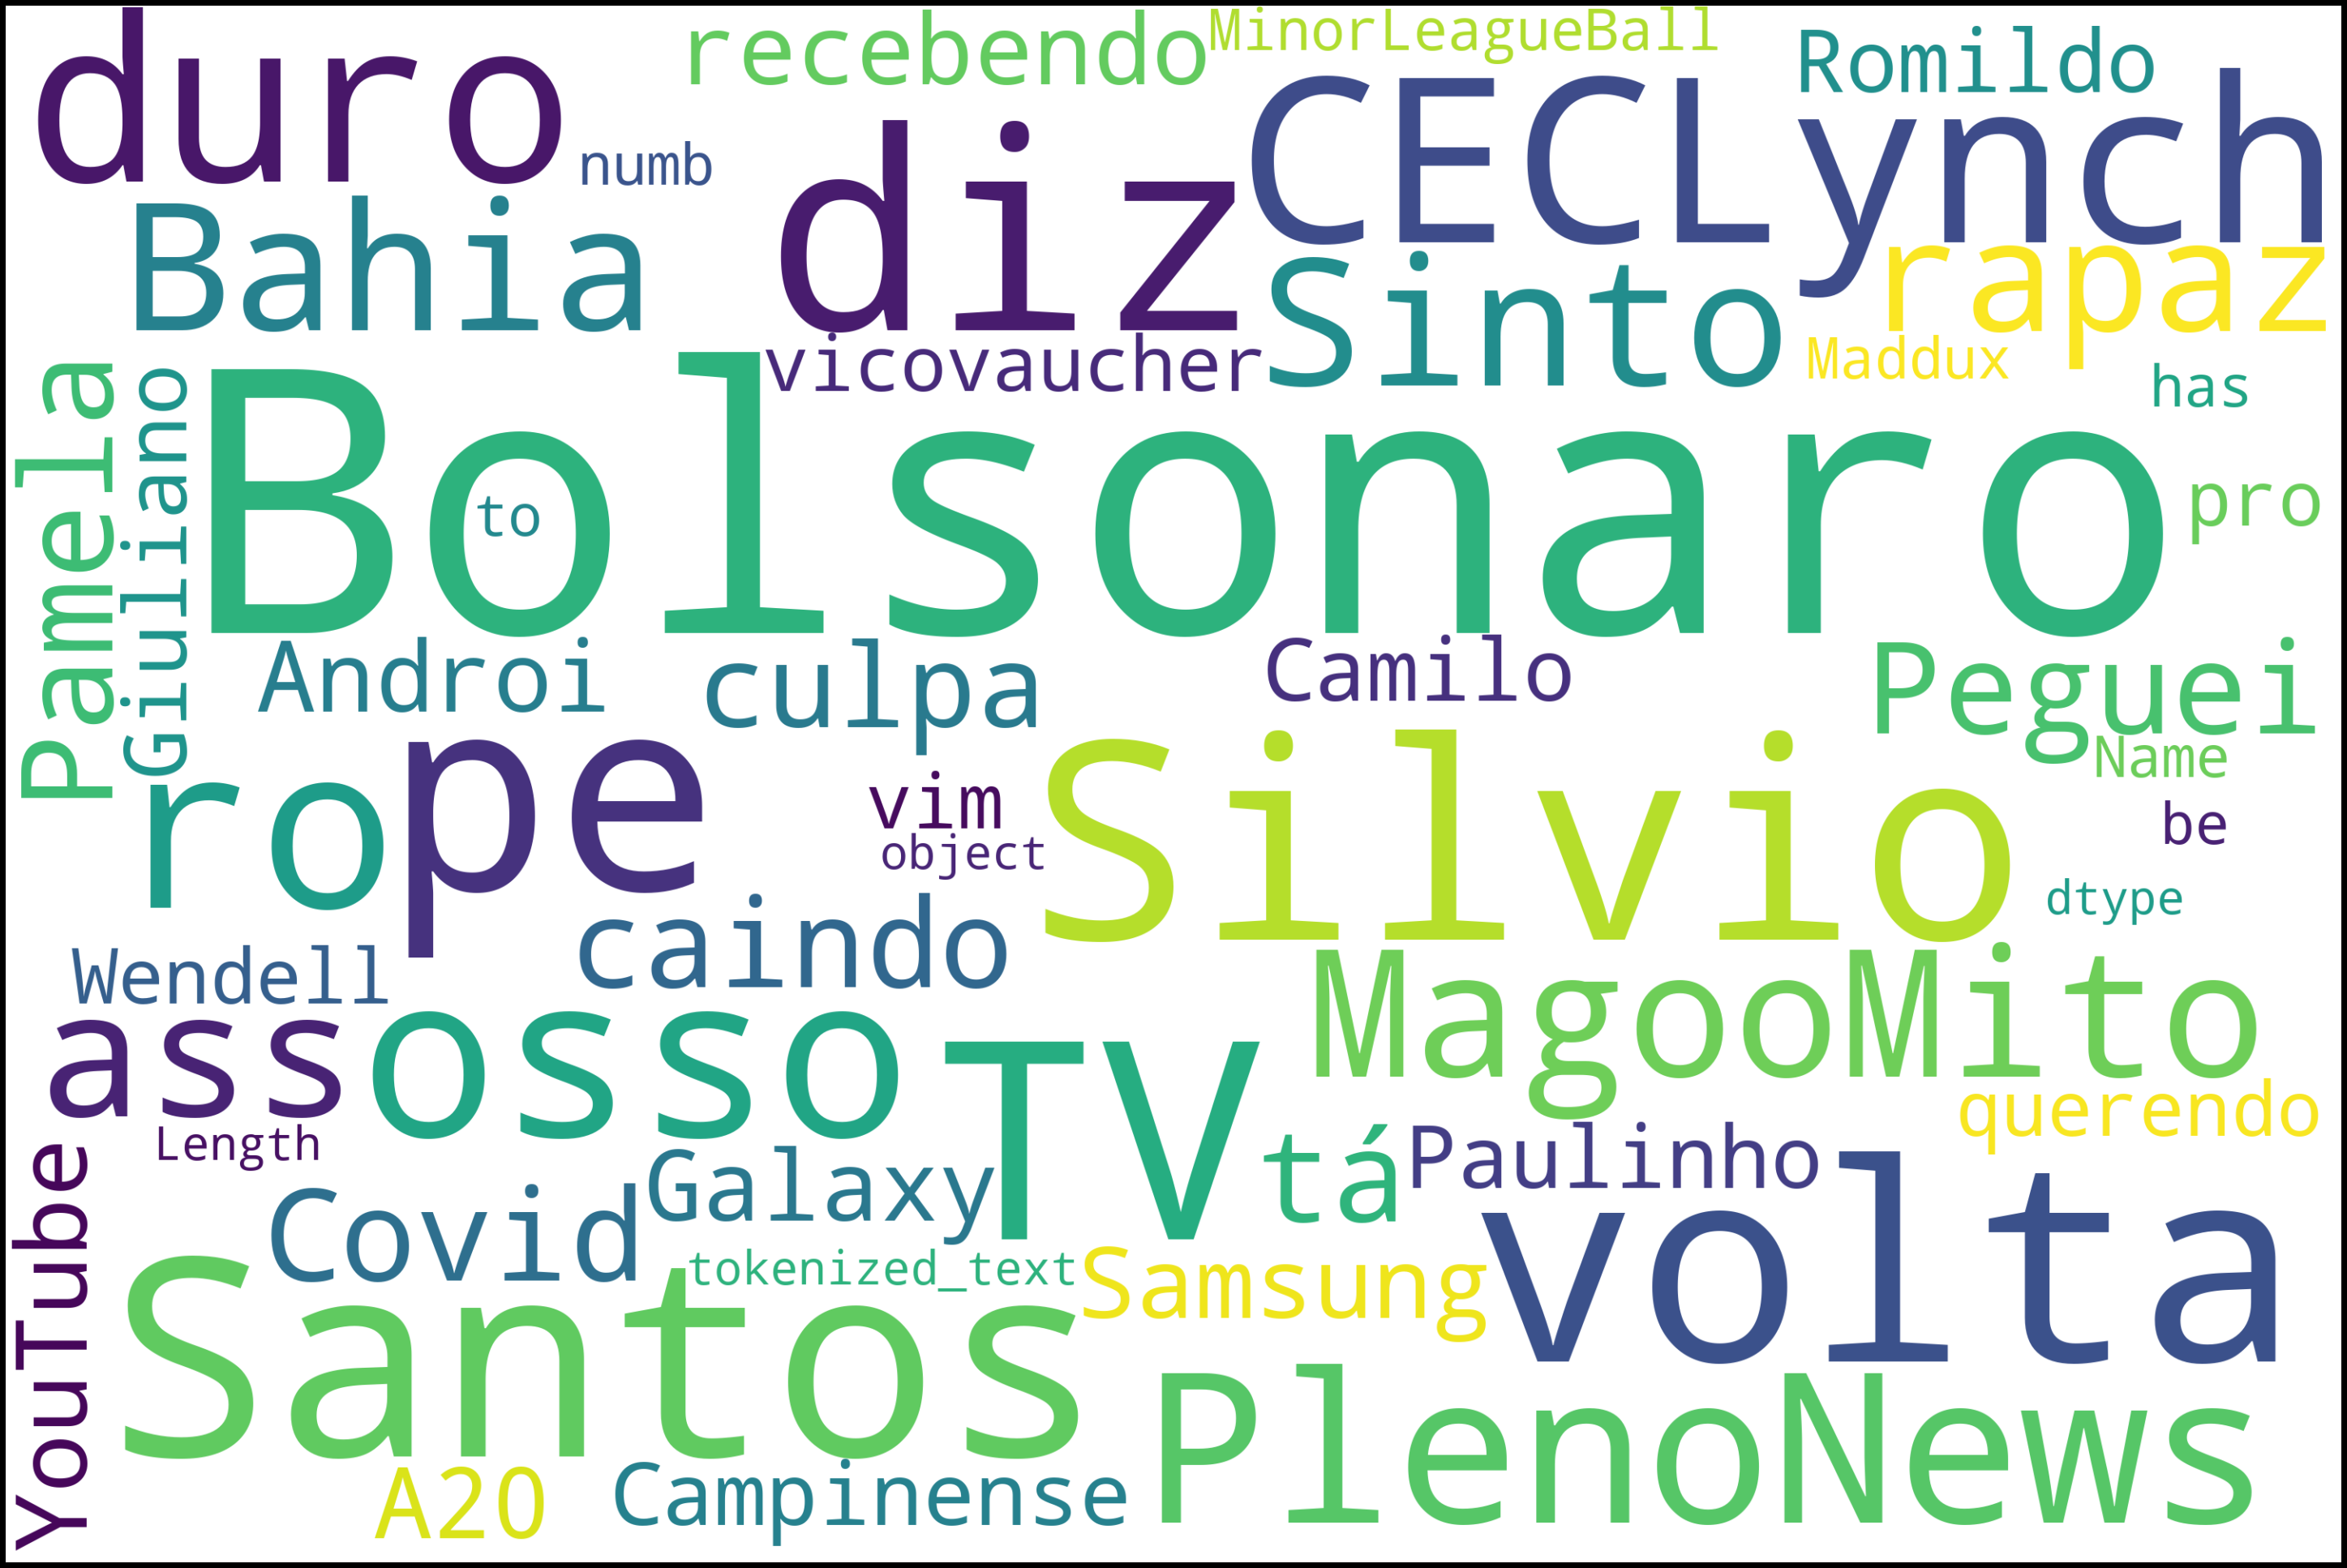

In [118]:
#Wendell Lima
text = dfTweets.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

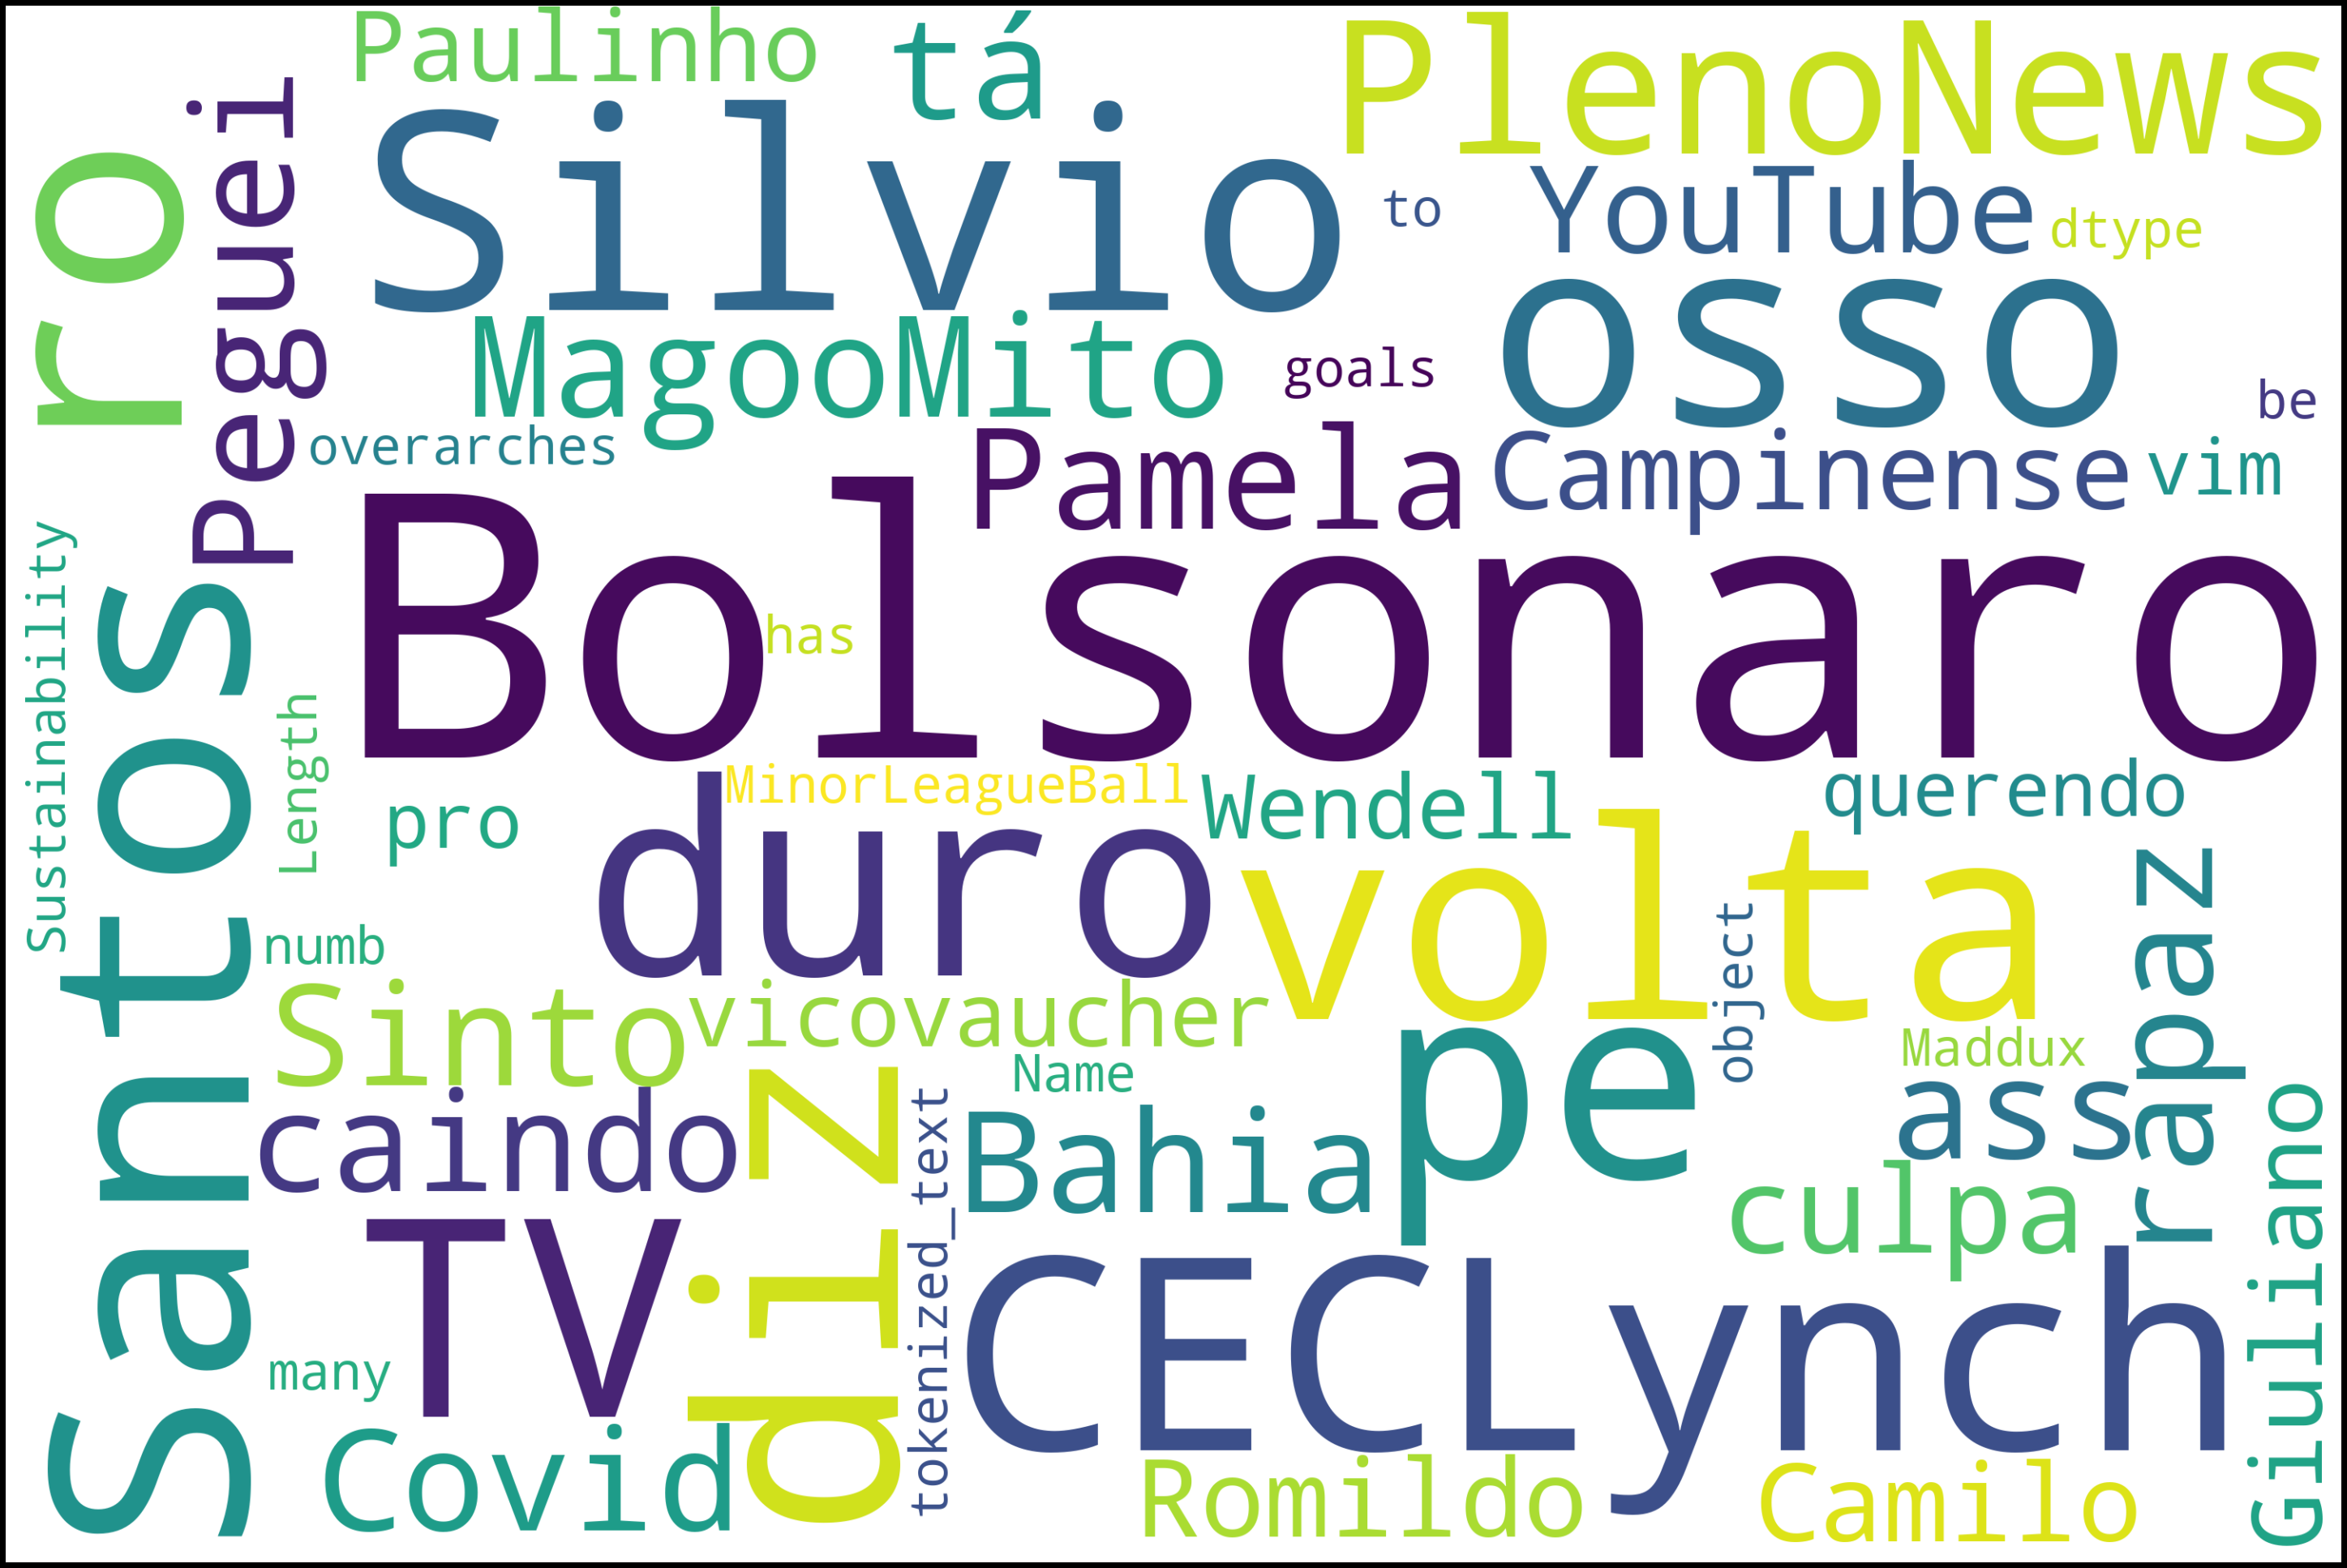

In [126]:
#Almanara
text = dfTweets.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()